# Credit Card Fraud Detection

# Anamoly Detection

Confusion Matrix:
 [[54098  2766]
 [   14    84]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962



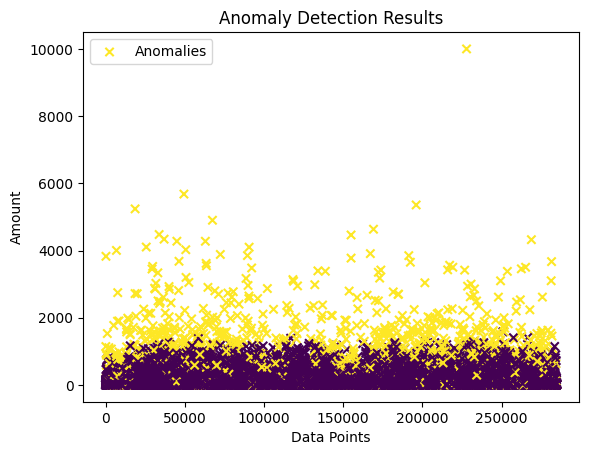

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv("D:\Oasis-infobyte\creditcard.csv")

# Separate features and target variable
features = df.drop('Class', axis=1)
target = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train_scaled)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize anomalies
plt.scatter(X_test.index, X_test['Amount'], c=y_pred, cmap='viridis', marker='x', label='Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Amount')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()


# Machine Lerning Model

In [25]:

# Separate Class and target variable
features = df.drop('Class', axis=1)
target = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
tree_predictions = tree_model.predict(X_test_scaled)

# Neural Network (Multi-Layer Perceptron)
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, tree_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_predictions))
print("Classification Report:\n", classification_report(y_test, tree_predictions))

print("\nNeural Network:")
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_predictions))
print("Classification Report:\n", classification_report(y_test, nn_predictions))


Logistic Regression:
Accuracy: 0.9990695551420246
Confusion Matrix:
 [[56854    10]
 [   43    55]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Decision Tree:
Accuracy: 0.9990519995786665
Confusion Matrix:
 [[56830    34]
 [   20    78]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Neural Network:
Accuracy: 0.9995084442259752
Confusion Matrix:
 [[56853    11]
 [   17    81]]
Classif

# Feature Engineering

In [37]:
# 1. Standardize numerical features
numerical_features = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 2. Create new features
# Example: Transaction hour of the day
df['HourOfDay'] = pd.to_datetime(df['Time']).dt.hour

# 3. Drop unnecessary columns
# Example: If 'Time' is not needed after extracting the hour, you can drop it
df = df.drop(['Time'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56861     3]
 [   21    77]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# Real Time Monitoring

In [2]:
def real_time_monitoring(transaction):
    if transaction['amount'] > 1000 and transaction['location'] == 'overseas':
        print("Potential fraud detected. Alerting authorities.")
    # Additional real-time checks...


# Scalibility

In [ ]:
from multiprocessing import Pool

def process_transaction(transaction):
    # Processing logic here
    pass

def process_transactions_in_parallel(transactions, num_processes=4):
    with Pool(num_processes) as pool:
        pool.map(process_transaction, transactions)
